# Least squares and eigenvalues

### Problem 1

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la

In [7]:
def p_1(A, b):
    Q, R = la.qr(A, mode='economic')
    M = np.matmul(np.transpose(Q), b)
    x = la.solve_triangular(R, M)
    return x

### Problem 2

In [41]:
housing = np.load('housing.npy')

In [37]:
N_2 = len(housing) #get length of matrices

y_2 = np.zeros((N_2, 1)) #initialse some matrices
X_2 = np.zeros((N_2, 2))

y_2 = housing[:,1]
y_2 = y_2.reshape((33,1)) #Make the same shape so array broadcasting works

ones = np.ones((N_2, 1))
ones_1 = ones.reshape((33,)) #Make the same shape so array broadcasting works

X_2[:, 0] = ones_1
X_2[:, 1] = housing[:, 0]

beta_2 = p_1(X_2, y_2) #solve least squares problem

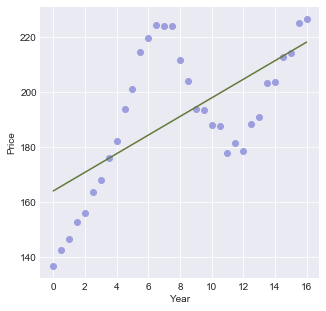

In [40]:
plt.style.use('seaborn-darkgrid') #make the charts look pretty
palette = plt.get_cmap('tab20b')

plt.figure(figsize=(5, 5)) #set figure size

plt.scatter(X_2[:,1], y_2, color=palette(3))
plt.plot(X_2[:,1], beta_2[0]+beta_2[1]*X_2[:,1], color=palette(4))
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

### Problem 3

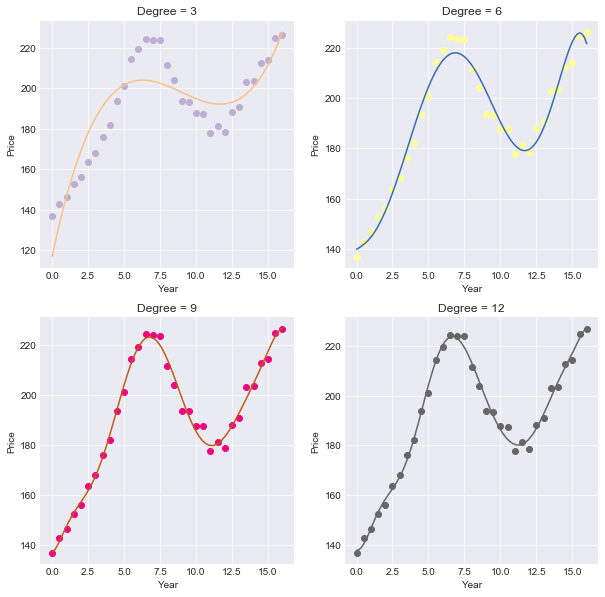

In [67]:
y_p3 = y_2

def p_3():
    vand_3 = np.vander(housing[:, 0], 4)
    beta_3 = la.lstsq(vand_3, y_p3)[0]
    f_3 = np.poly1d(beta_3.flatten())
    
    vand_6 = np.vander(housing[:, 0], 7)
    beta_6 = la.lstsq(vand_6, y_p3)[0]
    f_6 = np.poly1d(beta_6.flatten())
    
    vand_9 = np.vander(housing[:, 0], 10)
    beta_9 = la.lstsq(vand_9, y_p3)[0]
    f_9 = np.poly1d(beta_9.flatten())
    
    vand_12 = np.vander(housing[:, 0], 13)
    beta_12 = la.lstsq(vand_12, y_p3)[0]
    f_12 = np.poly1d(beta_12.flatten())
    
    dom = np.linspace(0, 16, 100)
    
    plt.figure(figsize=(10, 10)) #set figure size
    
    palette = plt.get_cmap('Accent')
    
    plt.subplot(2, 2, 1)
    plt.scatter(X_2[:,1], y_p3, color=palette(1))
    plt.plot(dom, f_3(dom), color=palette(2))
    plt.title('Degree = 3')
    plt.xlabel('Year')
    plt.ylabel('Price')
    
    plt.subplot(2, 2, 2)
    plt.scatter(X_2[:,1], y_p3, color=palette(3))
    plt.plot(dom, f_6(dom), color=palette(4))
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title('Degree = 6')
    
    plt.subplot(2, 2, 3)
    plt.scatter(X_2[:,1], y_p3, color=palette(5))
    plt.plot(dom, f_9(dom), color=palette(6))
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title('Degree = 9')
    
    plt.subplot(2, 2, 4)
    plt.scatter(X_2[:,1], y_p3, color=palette(7))
    plt.plot(dom, f_12(dom), color=palette(8))
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title('Degree = 12')
              
    plt.show()

    return

p_3()


### Problem 4

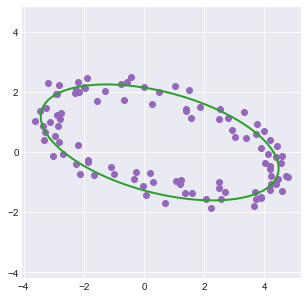

In [84]:
def p_4():
    e_x, e_y = np.load('ellipse.npy').T
    q = np.ones(len(e_x)) #set right hand side of eq
    p = np.column_stack((e_x**2, e_x, e_x*e_y, e_y, e_y**2)) #set left hand side
    a, b, c, d, e = la.lstsq(p, q)[0] #find least sq solution
    
    #plotting code from book
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.figure(figsize=(5, 5))
    palette = plt.get_cmap('tab20')
    plt.scatter(e_x, e_y, color=palette(8))
    plt.plot(r*cos_t, r*sin_t, lw=2, color=palette(4))
    plt.gca().set_aspect('equal', 'datalim')
    plt.show()

p_4()

### Problem 5

In [106]:
def p_5(A, N, tol=0.001):
    m, n = A.shape
    x = np.random.rand(n)
    temp = x / np.sqrt(np.inner(x, x))
    x = temp
    dist = 100
    iters = 1
    while dist > tol and iters < N:
        dist = np.sqrt(np.inner(A@x - x, A@x - x))
        x = A @ x
        x = x / np.sqrt(np.inner(x, x))
        iters += 1
    return x.T @ A @ x, x

In [108]:
A = np.random.random((10,10))
eigs, vecs = la.eig(A)
loc=np.argmax(eigs)
lamb, x = eigs[loc], vecs[:, loc]

mylamb, my_x = p_5(A, 10)

print(lamb, mylamb)

(4.958611268373933+0j) 4.9586112502112085


### Problem 6

In [126]:
def p_6(A, N, tol=0.001):
    m, n = A.shape
    S = la.hessenberg(A)
    dist = 100
    iters = 1
    while iters < N:
        Q, R = la.qr(S)
        S = R @ Q
        iters += 1
    eigs = np.empty(n)
    i = 0
    while i < n:
        if i == n-1 or S[i+1, i] < tol:
            eigs[i] = S[i, i]
            i += 1
        else:
            a = S[i, i]
            b = S[i, i+1]
            c = S[i+1, i]
            d = S[i+1, i+1]
            eig1, eig2 = np.roots([1, -a-d, a*d - b*c])
            eigs[i] = eig1
            eigs[i+1] = eig2
            i += 2
    return eigs
            

In [131]:
A = np.random.random((10,10))
X = A.T + A
theireig = la.eig(X)[0]
myeig = p_6(X, 10)
print(myeig, theireig)

[10.51405286 -1.34866114  1.53164305  1.26205419  1.33852754 -0.87673344
  0.85892485 -0.59955843 -0.44017103  0.18469092] [10.51405286+0.j -1.68169848+0.j -0.91930922+0.j -0.59972024+0.j
 -0.44001884+0.j  0.18469092+0.j  0.85723573+0.j  1.69538943+0.j
  1.54388235+0.j  1.27026487+0.j]
